# Task 1
Display samples from this dataset in a 5 x C table: columns correspond to character IDs, rows to five random samples from the same category.

In [1]:
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Load Data

In [3]:
transform=transforms.Compose([lambda img: torchvision.transforms.functional.rotate(img, -90),
                                transforms.RandomHorizontalFlip(p=1),
                                transforms.ToTensor()])

training_data = datasets.EMNIST(
    root="./data",
    split="byclass",
    download=True,
    transform=transform
)

## Plot Data

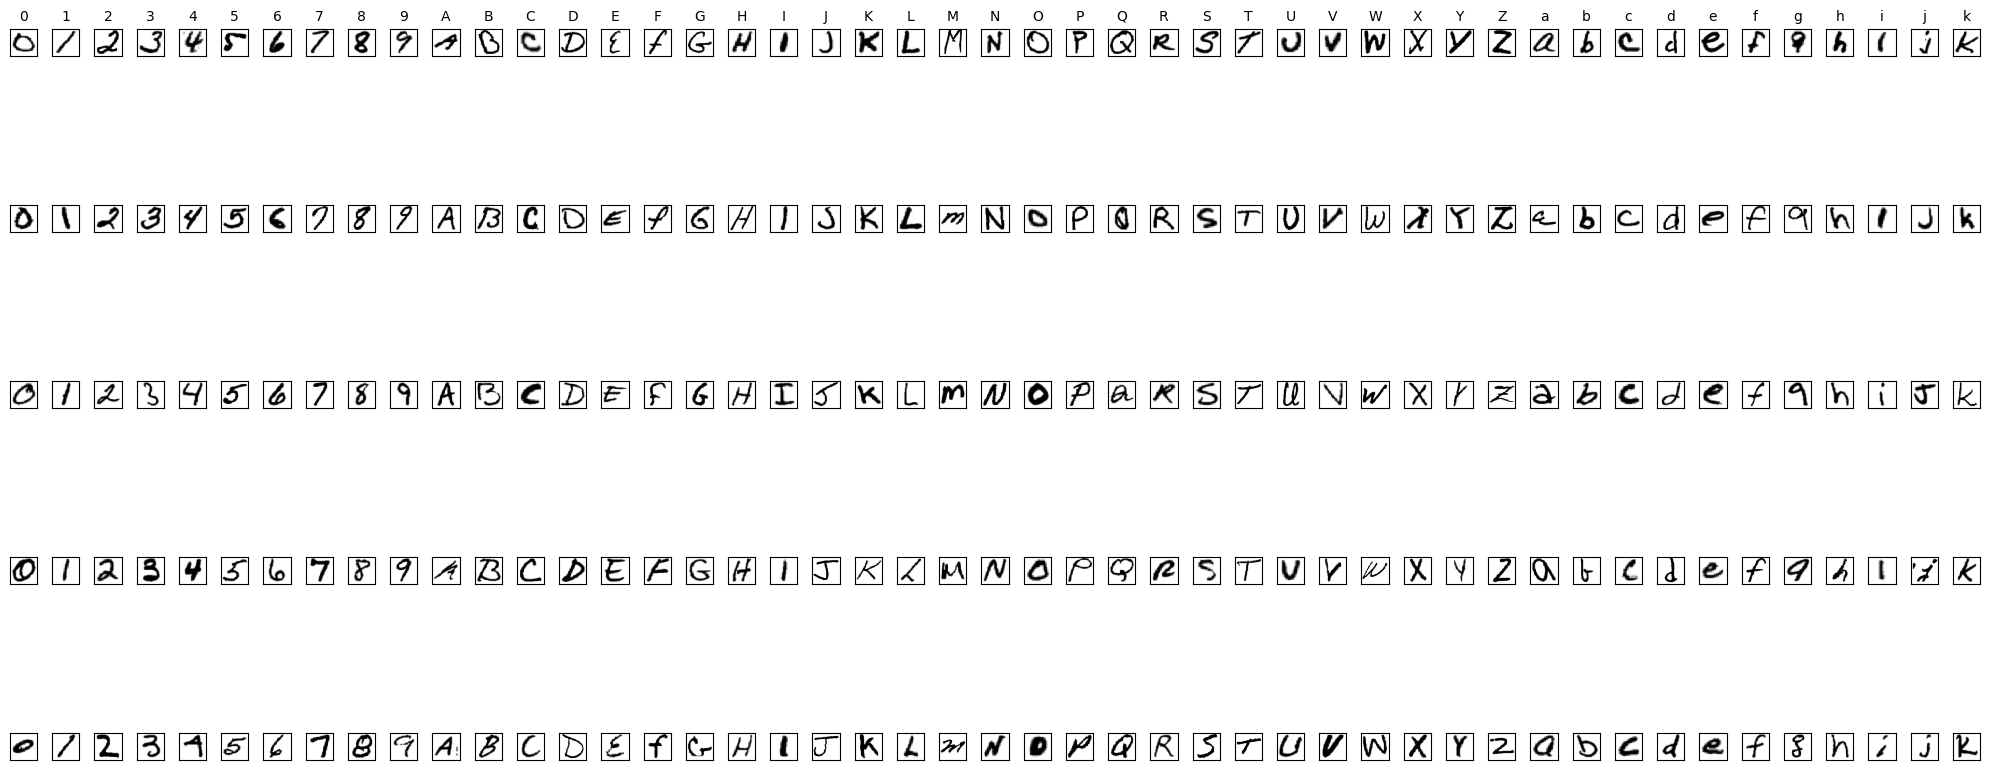

In [4]:
# Define constants
C = 47  # Number of classes in EMNIST balanced dataset
ROWS, COLS = 5, C

# Initialize a list to store indices for each character ID
indices = {label: [] for label in range(C)}

# Fill the indices list
for i, (_, label) in enumerate(training_data):
    if label in indices and len(indices[label]) < ROWS:
        indices[label].append(i)

# Display the samples in 5 x C format
figure = plt.figure(figsize=(20, 10))

for col, label in enumerate(indices.keys()):
    for row, idx in enumerate(indices[label]):
        img, label_idx = training_data[idx]
        figure.add_subplot(ROWS, COLS, col + row * COLS + 1)
        label_name = training_data.classes[label_idx]
        if row == 0:
            plt.title(label_name, fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img.squeeze(), cmap=plt.cm.binary)

plt.tight_layout()
plt.savefig('Task_1.png', dpi=300, bbox_inches='tight')
plt.show()